In [2]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("twitter_data.csv")

In [4]:
df.head()

,UserID,No Of Abuse Report,No Of Rejected Friend Requests,No Of Freind Requests Thar Are Not Accepted,No Of Friends,No Of Followers,No Of Likes To Unknown Account,No Of Comments Per Day,Fake Or Not Category
0,1,37,415,204,290,838,26,53,1
1,2,63,383,542,652,349,37,58,1
2,3,10,151,244,863,271,73,11,1
3,4,83,54,604,496,937,37,55,1
4,5,47,834,326,401,928,80,78,1


In [5]:
df.tail()

,UserID,No Of Abuse Report,No Of Rejected Friend Requests,No Of Freind Requests Thar Are Not Accepted,No Of Friends,No Of Followers,No Of Likes To Unknown Account,No Of Comments Per Day,Fake Or Not Category
995,996,79,966,886,135,881,87,85,1
996,997,69,47,344,944,216,3,44,1
997,998,16,556,104,896,958,49,97,0
998,999,8,169,944,95,874,6,26,0
999,1000,28,419,207,211,164,93,99,1


In [6]:
df.size

9000

In [7]:
df.shape

(1000, 9)

In [8]:
df.columns

Index(['UserID', 'No Of Abuse Report', 'No Of Rejected Friend Requests',
       'No Of Freind Requests Thar Are Not Accepted', 'No Of Friends',
       'No Of Followers', 'No Of Likes To Unknown Account',
       'No Of Comments Per Day', 'Fake Or Not Category'],
      dtype='object')

In [10]:
df['Fake Or Not Category'].unique()

array([1, 0], dtype=int64)

In [ ]:
df.dtypes

In [ ]:
df['label'].value_counts()

In [ ]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(df.corr(),annot=True)

In [11]:
df[1:2]


,UserID,No Of Abuse Report,No Of Rejected Friend Requests,No Of Freind Requests Thar Are Not Accepted,No Of Friends,No Of Followers,No Of Likes To Unknown Account,No Of Comments Per Day,Fake Or Not Category
1,2,63,383,542,652,349,37,58,1


### Seperating features and target label

In [12]:
features = df[['No Of Abuse Report', 'No Of Rejected Friend Requests','No Of Freind Requests Thar Are Not Accepted','No Of Friends', 'No Of Followers', 'No Of Likes To Unknown Account', 'No Of Comments Per Day']]
target = df['Fake Or Not Category']


In [13]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [14]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00       165

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [18]:
score

array([1., 1., 1., 1., 1.])

### Saving trained Decision Tree model

In [19]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.985
              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.98      1.00      0.99       165

    accuracy                           0.98       200
   macro avg       0.99      0.96      0.97       200
weighted avg       0.99      0.98      0.98       200



In [21]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.96 , 0.985, 0.97 , 0.98 , 0.985])

### Saving trained Guassian Naive Bayes model

In [22]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [23]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.975
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        35
           1       0.99      0.98      0.98       165

    accuracy                           0.97       200
   macro avg       0.94      0.97      0.96       200
weighted avg       0.98      0.97      0.98       200



In [24]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.865, 0.875, 0.86 , 0.875, 0.87 ])

In [25]:
#Saving trained SVM model

In [26]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = 'SVMClassifier.pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00       165

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [28]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.985, 1.   , 1.   , 1.   , 1.   ])

### Saving trained Random Forest model

In [29]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

## Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

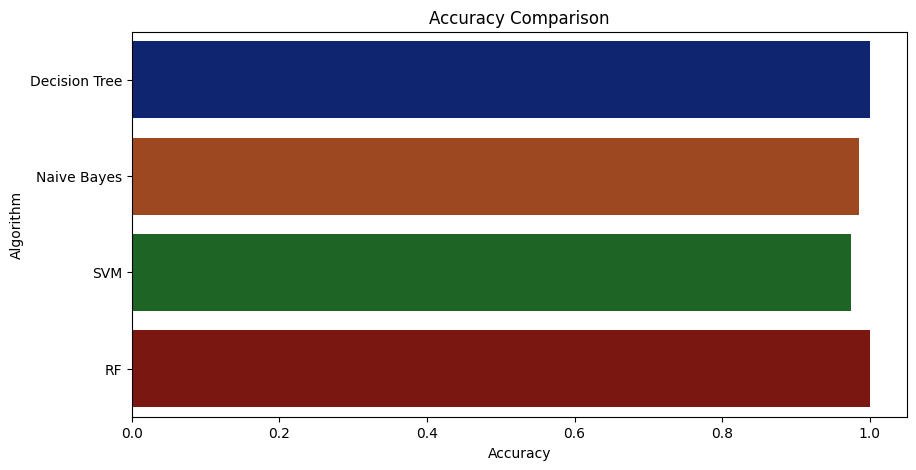

In [30]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [31]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 1.0
Naive Bayes --> 0.985
SVM --> 0.975
RF --> 1.0


## Making a prediction

In [32]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

[1]


In [33]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

[1]


In [34]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

[1]


In [35]:
df[1:2]

,UserID,No Of Abuse Report,No Of Rejected Friend Requests,No Of Freind Requests Thar Are Not Accepted,No Of Friends,No Of Followers,No Of Likes To Unknown Account,No Of Comments Per Day,Fake Or Not Category
1,2,63,383,542,652,349,37,58,1


In [38]:
from tkinter import *
from tkinter import ttk


root = Tk()
root.title('Fake Account prediction System')
root.geometry('850x650')
root.configure(background="purple2")
var = StringVar()
label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="purple2")
var.set('Fake Account prediction System')
label.grid(row=0,columnspan=6)

label_1 = ttk.Label(root, text ='No Of Abuse Report',font=("Helvetica", 16),background="Purple3")
label_1.grid(row=11,column=0)
    
Entry_1= Entry(root)
Entry_1.grid(row=11,column=1)

label_2 = ttk.Label(root, text ='No Of Rejected Friend Requests',font=("Helvetica", 16),background="Purple3")
label_2.grid(row=12,column=0)
    
Entry_2 = Entry(root)
Entry_2.grid(row=12,column=1)
    
    
label_3 = ttk.Label(root, text ='No Of Freind Requests Thar Are Not Accepted',font=("Helvetica", 16),background="Purple3")
label_3.grid(row=13,column=0)
    
Entry_3 = Entry(root)
Entry_3.grid(row=13,column=1)

label_4 = ttk.Label(root, text ='No Of Friends',font=("Helvetica", 16),background="Purple3")
label_4.grid(row=14,column=0)
    
Entry_4= Entry(root)
Entry_4.grid(row=14,column=1)


label_5 = ttk.Label(root, text ='No Of Followers',font=("Helvetica", 16),background="Purple3")
label_5.grid(row=15,column=0)
    
Entry_5 = Entry(root)
Entry_5.grid(row=15,column=1)


label_6 = ttk.Label(root, text ='No Of Likes To Unknown Account',font=("Helvetica", 16),background="Purple3")
label_6.grid(row=16,column=0)
    
Entry_6 = Entry(root)
Entry_6.grid(row=16,column=1)


label_7 = ttk.Label(root, text ='No Of Comments Per Day',font=("Helvetica", 16),background="Purple3")
label_7.grid(row=17,column=0)
    
Entry_7 = Entry(root)
Entry_7.grid(row=17,column=1)



def predict():
    att1 = Entry_1.get()
    att2 = Entry_2.get()
    att3 = Entry_3.get()
    att4 = Entry_4.get()
    att5 = Entry_5.get()
    att6 =Entry_6.get()  
    att7 = Entry_7.get()   
    out = RF.predict([[float(att1),
       float(att2),
       float(att3),
       float(att4),
       float(att5),
       float(att6),
       float(att7)]])     ##float(area)
    if out[0]==0:
        res="Fake"
    else:
        res="Not Fake"
    output.delete(0,END)
    output.insert(0,res)

b1 = Button(root, text = 'predict',font=("Helvetica", 16),background="Purple3",command = predict)
b1.grid(row=20,column=0)
    

output = Entry(root)
output.grid(row=20,column=1)
    
root.mainloop()
